In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Werte der Messungen als arrays aufgeschrieben um sie später zu plotten

#Tabelle 1, 1a, R=48.7
U_1_1 = np.array([-.25,-.20,-.15,-0.1,0.01,0.05,.125,0.22])
dU_1_1 = np.array([.003,.003,.001,.001,.0005,.001,.001,.001])
U_A_1 = np.array([4,3.27,2.4,1.59,-0.17,-0.8,-2.06,-3.59])
dU_A_1 =np.array([0.05,0.03,0.03,0.01,0.01,0.01,0.03,0.03]) 

#Tabelle 2, 1a, R=274
U_1_2 = np.array([-.25,-.2,-.15,-.1,.01,.05,.125,.22])
dU_1_2 = np.array([0.003, 0.003, 0.001, 0.001, 0.0005, 0.001, 0.0005, 0.001])
U_A_2 = np.array([14.4,14.4,13.6,9,-1,-4.64,-11.5,-13])
dU_A_2 = np.array([0.05, 0.03, 0.03, 0.01, 0.01, 0.01, 0.03, 0.03])

#Tabelle 3, 1b
#R=274
U_G_3 = np.array([.0160,.032,.048,.064,.080,.096])
dU_G_3 = np.array([.0001,.0002,.0004,.0005,.0006,.0007,])
U_1_3 = U_G_3
dU_1_3 = dU_G_3
U_A1_3 = np.array([1.28,2.48,3.68,4.88,6.16,7.4])
dU_A1_3 = np.array([.01,.02,0.02,.02,.02,.02])
#R=680
U_G_31=np.array([.0160,.032,.048,.064,.080,.096])
dU_G_31=np.array([.0001,.0002,.0004,.0005,.0006,.0007,])
U_1_31=U_G_31
dU_1_31=dU_G_31
U_A2_3 = np.array([3.12,6.24,9.2,12.2,15.2,18.6])
dU_A2_3 = np.array([.02,.02,0.05,.05,.05,.1])

#Tabelle 4, 2a und 2b
#R=680
f_1=np.array([.1,.32,.7,1,3,6,10,30,60,100,200,300])*1000
df_1=np.array([.0002,.001,.001,.001,.003,.006,.02,.06,.09,.1,.5,.7])*1000
U_A1_4 = np.array([5.8,5.72,5.64,5.52,4.08,2.6,1.68,0.57,0.29,0.18,0.096,0.060])
dU_A1_4 = np.array([0.02,0.02 , 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01])
#R=274
f_2=np.array([.1,.32,.7,1,3,6,10,30,60,100,200,300])*1000
df_2=np.array([.0002,.001,.001,.001,.001,.003,0.02,.06,.2,.3,.5,.7])*1000
U_A2_4 = np.array([2.28,2.28,2.28,2.28,2.16,1.84,1.4,0.55,0.28,0.176,0.086,0.06])
dU_A2_4 = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01,0.01, 0.005, 0.005, 0.005, 0.005, 0.005])
#R=48.7
f_3=np.array([.1,.32,.7,1,3,6,10,30,60,100,200,300])*1000
df_3=np.array([.0002,.001,.001,.001,.001,.003,0.02,.06,.2,.3,.5,.7])*1000
U_A3_4 = np.array([1.36,1.36,1.36,1.36,1.36,1.36,1.34,1.08,0.76,0.52,0.28,0.2])
dU_A3_4 = np.array([ 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
#R=48.7 und C=560
f_4=np.array([.1,.32,.7,1,3,6,10,30,60,100,200,300])*1000
df_4=np.array([.0002,.001,.001,.001,.001,.003,0.02,.06,.2,.3,.5,.7])*1000
U_A4_4 = np.array([1.36,1.36,1.36,1.36,1.19,0.94,0.688,0.26,0.136,0.081,0.044,0.032])
dU_A4_4 = np.array([0.01,0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005,0.005, 0.005, 0.005])

#Tabelle 5, 2c
f_5 = np.array([0.3,0.5,0.8,1,4,8,10,15,20])*1000
df_5 = np.array([0.0002,0.001,0.001,0.002,0.005,0.006,0.01,0.03,0.05])*1000
U_A_5 = np.array([0.384,0.592,0.840,0.960,1.40,1.36,1.36,1.34,1.30])
dU_A_5 = np.array([0.005, 0.005, 0.005, 0.005, 0.1, 0.1, 0.1,0.01,0.01])


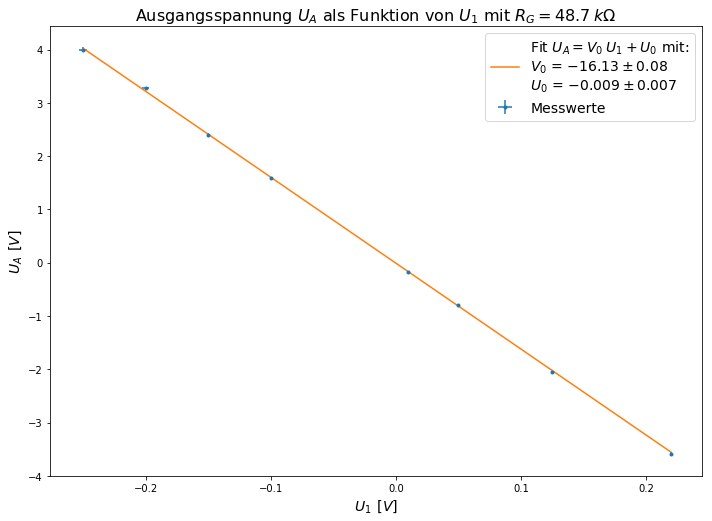

In [33]:
#1a, R1

#Definition der Fitfunktion
def fit_func(x, a, b): 
    return a*x+b

popt, pcov = curve_fit( fit_func, U_1_1, U_A_1, sigma = dU_A_1)

#Plot mit Fit
plt.errorbar(U_1_1, U_A_1, yerr=dU_A_1, xerr=dU_1_1, fmt=".", label="Messwerte")
plt.xlabel(r'$U_1 \:\: [V]$', fontsize=14)
plt.ylabel(r'$U_A \:\: [V]$', fontsize=14)
plt.title(r'Ausgangsspannung $U_A$ als Funktion von $U_1$ mit $R_G=48.7 \:k\Omega$', fontsize=16)
plt.plot(U_1_1, fit_func(U_1_1, *popt), label="\n".join([r"Fit $U_A = V_0 \: U_1 + U_0$ mit:"," = ".join([r'$V_0$',r'${:.2f}\pm{:.2f}\:$'.format(popt[0], np.sqrt(pcov[0][0]),{-1})])," = ".join([r'$U_0$',r'${:.3f}\pm{:.3f} \:$'.format( popt[1], np.sqrt(pcov[1][1]))])         ]))
plt.legend(loc="upper right", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(11.69, 8.27)
plt.savefig("1a_R1.pdf", dpi=150)

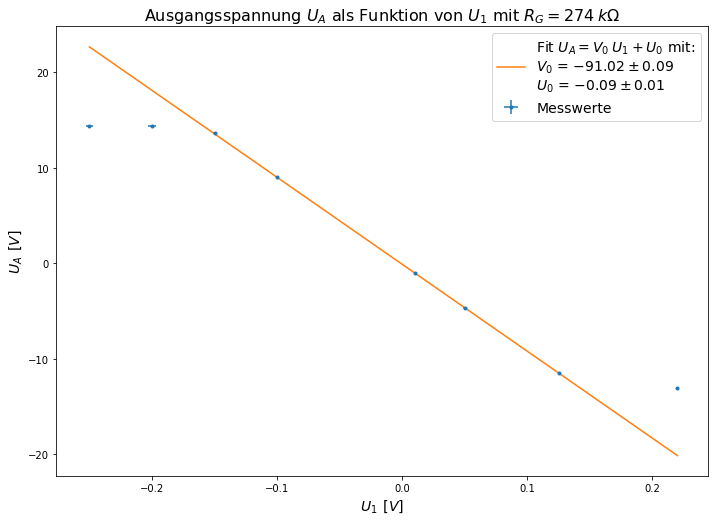

In [34]:
#1a, R2

popt, pcov = curve_fit( fit_func, U_1_2[2:7], U_A_2[2:7], sigma = dU_A_2[2:7])

#Plot mit Fit
plt.errorbar(U_1_2, U_A_2, yerr=dU_A_2, xerr=dU_1_2, fmt=".", label="Messwerte")
plt.xlabel(r'$U_1 \:\: [V]$', fontsize=14)
plt.ylabel(r'$U_A \:\: [V]$', fontsize=14)
plt.title(r'Ausgangsspannung $U_A$ als Funktion von $U_1$ mit $R_G=274 \:k\Omega$', fontsize=16)
plt.plot(U_1_2[0:8], fit_func(U_1_2[0:8], *popt), 
         label="\n".join([
             r"Fit $U_A = V_0 \: U_1 + U_0$ mit:",
             " = ".join([r'$V_0$',r'${:.2f}\pm{:.2f}\:$'.format(popt[0], np.sqrt(pcov[0][0]),{-1})]), 
             " = ".join([r'$U_0$',r'${:.2f}\pm{:.2f} \:$'.format( popt[1], np.sqrt(pcov[1][1]))])
         ]))
plt.legend(loc="upper right", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(11.69, 8.27)
plt.savefig("1a_R2.pdf", dpi=150)

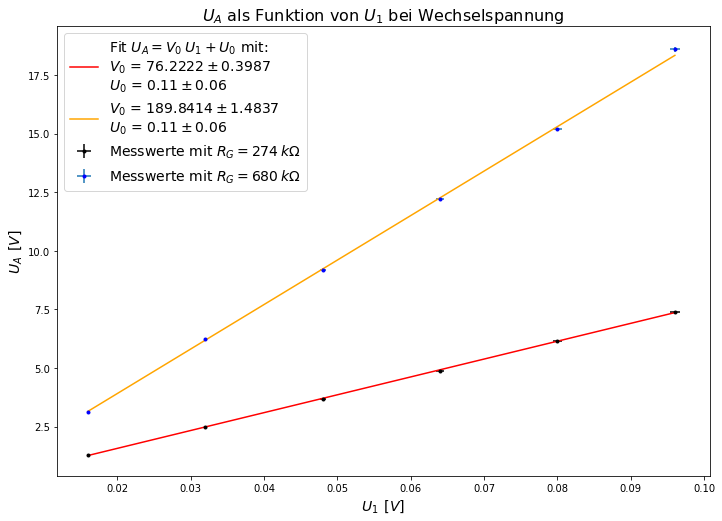

In [35]:
#1b

popt1, pcov1 = curve_fit( fit_func, U_1_3, U_A1_3, sigma = dU_A1_3)
popt2, pcov2 = curve_fit( fit_func, U_1_31, U_A2_3, sigma = dU_A2_3)

#Plot mit Fit
plt.errorbar(U_1_3, U_A1_3, yerr=dU_A1_3, xerr=dU_1_3, fmt=".", label=r"Messwerte mit $R_G=274 \:k\Omega$", color='black')
plt.errorbar(U_1_31, U_A2_3, yerr=dU_A2_3, xerr=dU_1_31, fmt=".", label=r"Messwerte mit $R_G=680 \:k\Omega$", Color='blue')
plt.xlabel(r'$U_1 \:\: [V]$', fontsize=14)
plt.ylabel(r'$U_A \:\: [V]$', fontsize=14)
plt.title(r'$U_A$ als Funktion von $U_1$ bei Wechselspannung', fontsize=16)
plt.plot(U_1_3, fit_func(U_1_3, *popt1), color='red' ,
         label="\n".join([
             r"Fit $U_A = V_0 \: U_1 + U_0$ mit:",
             " = ".join([r'$V_0$',r'${:.4f}\pm{:.4f}\:$'.format(popt1[0], np.sqrt(pcov1[0][0]),{-1})]), 
             " = ".join([r'$U_0$',r'${:.2f}\pm{:.2f} \:$'.format( popt2[1], np.sqrt(pcov2[1][1]))])
         ]))
plt.plot(U_1_31, fit_func(U_1_31, *popt2), color='orange',
         label="\n".join([" = ".join([r'$V_0$',r'${:.4f}\pm{:.4f}\:$'.format(popt2[0], np.sqrt(pcov2[0][0]),{-1})]),
                          " = ".join([r'$U_0$',r'${:.2f}\pm{:.2f} \:$'.format( popt2[1], np.sqrt(pcov2[1][1]))])
         ]))
plt.legend(loc="upper left", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(11.69, 8.27)
plt.savefig("1b.pdf", dpi=150)

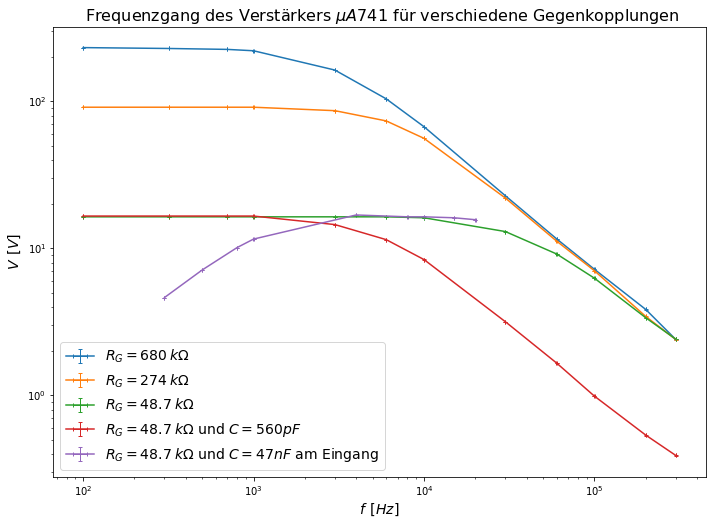

In [36]:
#Aufgabe 2

#Plot
plt.xlabel(r'$f \:\: [Hz]$', fontsize=14)
plt.ylabel(r'$V \:\: [V]$', fontsize=14)
plt.title(r' Frequenzgang des Verstärkers $\mu$$A741$ für verschiedene Gegenkopplungen', fontsize=16)
plt.yscale("log")
plt.xscale("log")

#Verstärkung V=U_A/U_1 als Funktion von f
plt.errorbar(f_1, U_A1_4/0.025, yerr=dU_A1_4, xerr=df_1, label=r"$R_G=680 \:k\Omega$", elinewidth=1, capsize=2)
plt.errorbar(f_2, U_A2_4/0.025, yerr=dU_A2_4, xerr=df_2, label=r"$R_G=274 \:k\Omega$", elinewidth=1, capsize=2)
plt.errorbar(f_3, U_A3_4/0.083, yerr=dU_A3_4, xerr=df_3, label=r"$R_G=48.7 \:k\Omega$", elinewidth=1, capsize=2)
plt.errorbar(f_4, U_A4_4/0.082, yerr=dU_A4_4, xerr=df_4, label=r"$R_G=48.7 \:k\Omega$ und $C=560 pF$", elinewidth=1, capsize=2)
plt.errorbar(f_5, U_A_5/0.083, yerr=dU_A_5, xerr=df_5, label=r"$R_G=48.7 \:k\Omega$ und $C=47 nF$ am Eingang", elinewidth=1, capsize=2)
plt.legend(loc="lower left", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(11.69, 8.27)
plt.savefig("2.Frequenzgang.pdf", dpi=200)